In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

df=pd.read_csv(r"C:\Users\sripa\OneDrive\Desktop\iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [21]:
df['variety_n']=LabelEncoder().fit_transform(df['variety'])
df

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_n
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [22]:
df=df.drop(['variety'],axis=1)
df

,sepal.length,sepal.width,petal.length,petal.width,variety_n
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
x=df.iloc[:,:4]
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y = df.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety_n, Length: 150, dtype: int64

In [31]:
x_scaled = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=42)

list1 = ['rbf', 'linear', 'poly', 'sigmoid']

for i in list1:
    svm_classifier = SVC(kernel=i, C=1.0, gamma='scale')
    svm_classifier.fit(x_train, y_train)
    y_pred = svm_classifier.predict(x_test)   # <-- prediction inside loop
    accuracy = accuracy_score(y_test, y_pred)
    print(f"The accuracy using kernel {i} is: {accuracy}")
    

The accuracy using kernel rbf is: 0.9833333333333333
The accuracy using kernel linear is: 0.9666666666666667
The accuracy using kernel poly is: 0.9666666666666667
The accuracy using kernel sigmoid is: 0.9166666666666666


In [29]:
print(svm_classifier.predict([[2,2,1,0]]))

[1]


In [27]:
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("the accuracy is {}%".format(accuracy*100))
print("the confusion matrix")
print(cm)
print("the classification report")
print(cr)

the accuracy is 91.66666666666666%
the confusion matrix
[[23  0  0]
 [ 0 15  4]
 [ 0  1 17]]
the classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.94      0.79      0.86        19
           2       0.81      0.94      0.87        18

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



<Axes: >

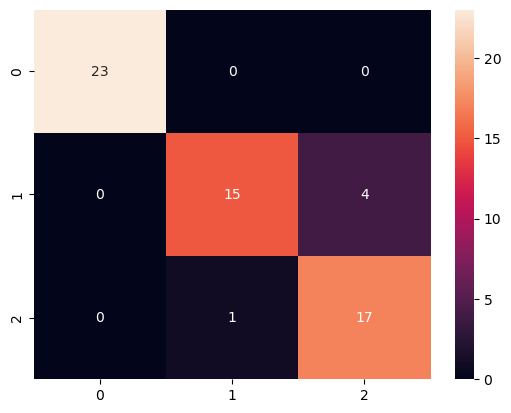

In [28]:

sns.heatmap(cm,annot=True)